# Heart Disease vs. Mental Health Rates

In [76]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


#file to load
mentalHealth_df = Path("../Resources/500_Cities_Mental_health_.csv")
heartDisease_df = Path("../Resources/states_df.csv")

heartDisease_df = pd.read_csv(heartDisease_df)
mentalHealth_df = pd.read_csv(mentalHealth_df)


# Data Cleaning

In [2]:
# Shows all the unique values under the State Description column

mentalHealth_df['StateDesc'].unique()

array(['Connecticut', 'Iowa', 'Louisiana', 'Minnesota', 'Nevada',
       'New York', 'Pennsylvania', 'North Carolin', 'North Dakota',
       'Ohio', 'Oklahoma', 'Texas', 'South Carolin', 'Tennessee', 'Utah',
       'Washington', 'West Virginia', 'Wisconsin', 'Alabama', 'Alaska',
       'Arizona', 'United States', 'California', 'Arkansas', 'Colorado',
       'Delaware', 'Florida', 'District of C', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'New Hampshire', 'New Jersey',
       'New Mexico', 'Rhode Island', 'Oregon', 'South Dakota', 'Virginia',
       'Vermont', 'Wyoming'], dtype=object)

In [3]:
# Drop Values in Array that aren't states
mental_states = mentalHealth_df.drop(mentalHealth_df.loc[mentalHealth_df['StateDesc'] == 'District of C', :].index)
mental_states = mental_states.drop(mentalHealth_df.loc[mentalHealth_df['StateDesc'] == 'United States', :].index)

# Mental Health & Heart Disease DataFrames

In [53]:
#Select Index
mental_health = mental_states[["StateDesc", 'CityName', "Data_Value", "PopulationCount","Measure"]] 
# Drops all rows that contain null values
mental_healthDf = mental_health.dropna()

mental_healthDf

,StateDesc,CityName,Data_Value,PopulationCount,Measure
0,Connecticut,Stamford,10.0,122643,Mental health not good for >=14 days among adu...
1,Iowa,Iowa City,13.2,67862,Mental health not good for >=14 days among adu...
2,Louisiana,Lake Charles,16.6,71993,Mental health not good for >=14 days among adu...
3,Minnesota,Minneapolis,11.4,382578,Mental health not good for >=14 days among adu...
4,Minnesota,Rochester,10.1,106769,Mental health not good for >=14 days among adu...
...,...,...,...,...,...
29001,Wisconsin,Milwaukee,18.4,2829,Mental health not good for >=14 days among adu...
29002,Wisconsin,Milwaukee,18.3,1451,Mental health not good for >=14 days among adu...
29003,Wisconsin,Milwaukee,19.7,4185,Mental health not good for >=14 days among adu...
29004,Wisconsin,Milwaukee,13.4,4913,Mental health not good for >=14 days among adu...


In [59]:
# Select Index
heart_disease = heartDisease_df[["StateDesc",'CityName', "Data_Value", "PopulationCount","Measure"]]
# Drops all rows that contain null values
heart_diseaseDf = heart_disease.dropna()
heart_disease= heart_disease.groupby(['StateDesc'])['CityName']


heart_diseaseDf

,StateDesc,CityName,Data_Value,PopulationCount,Measure
0,California,Hayward,4.8,144186,Coronary heart disease among adults aged >=18 ...
1,Alabama,Huntsville,6.7,180105,Coronary heart disease among adults aged >=18 ...
2,Arizona,Chandler,3.8,236123,Coronary heart disease among adults aged >=18 ...
3,Arizona,Surprise,5.9,117517,Coronary heart disease among adults aged >=18 ...
4,California,Bellflower,5.3,76616,Coronary heart disease among adults aged >=18 ...
...,...,...,...,...,...
28818,Wisconsin,Milwaukee,6.4,3197,Coronary heart disease among adults aged >=18 ...
28819,Washington,Tacoma,5.9,4855,Coronary heart disease among adults aged >=18 ...
28820,Wisconsin,Green Bay,5.8,2669,Coronary heart disease among adults aged >=18 ...
28821,Wisconsin,Milwaukee,6.5,3732,Coronary heart disease among adults aged >=18 ...


# Heart Disease Summary

In [61]:
# Calculate total number of states
total_states = heart_diseaseDf.StateDesc.nunique()

# Calculate total number of cities
total_cities = heart_diseaseDf.CityName.nunique()

# Calculate the total population
population = heart_diseaseDf.PopulationCount.sum()

# Calculate the average heart disease count
# Convert Heart Disease "Data_Value" from percent 
heart_disease = heart_diseaseDf.Data_Value*100

avgheart_disease = heart_disease.mean()

#Calulate Total heart Disease Count
totalHeart_disease = heart_disease.sum()

# Calculate the percentage of adults 18+ with Heart Disease
percent_heart = totalHeart_disease/population 

In [62]:
heartDisease_summary = pd.DataFrame({"Total States" : [total_states], 'Total Cities' : [total_cities], 
                        "Total Population" : [population], "Average Heart Disease Count" : [avgheart_disease], 
                        "Total Heart Disease Count" : [totalHeart_disease], "% Adults with Heart Disease": [percent_heart]})
#formatting
heartDisease_summary["% Adults with Heart Disease"] = heartDisease_summary["% Adults with Heart Disease"].map("{:.2%}".format)

heartDisease_summary            

,Total States,Total Cities,Total Population,Average Heart Disease Count,Total Heart Disease Count,% Adults with Heart Disease
0,50,473,307245461,560.846236,15720520.0,5.12%


# Mental Health Summary

In [49]:
# Calculate total number of states
Mtotal_states = mental_healthDf.StateDesc.nunique()

# Calculate total number of cities
Mtotal_cities = mental_healthDf.CityName.nunique()

# Calculate the total population
Mpopulation = mental_healthDf.PopulationCount.sum()

# Calculate average Mental Health not good for >=14 days
# Convert Heart Disease "Data_Value" from percent 
mental_health = mental_healthDf.Data_Value*100

avgmental_health = mental_health.mean()

#Calulate Total heart Disease Count
totalMental_health = mental_health.sum()

# Calculate the percentage of adults 18+ with not good mental health >=14 days
percent_mental = totalMental_health/Mpopulation

In [56]:
mentalHealth_summary = pd.DataFrame({"Total States" : [Mtotal_states], 'Total Cities' : [Mtotal_cities], 
                        "Total Population" : [Mpopulation], "Average Poor Mental Health Count" : [avgmental_health], 
                        "Total Adults with Poor Mental Health" : [totalMental_health], "% Adults with Poor Mental Health": [percent_mental]})
#formatting
mentalHealth_summary["% Adults with Poor Mental Health"] = mentalHealth_summary["% Adults with Poor Mental Health"].map("{:.2%}".format)

mentalHealth_summary    

,Total States,Total Cities,Total Population,Average Poor Mental Health Count,Total Adults with Poor Mental Health,% Adults with Poor Mental Health
0,50,473,307245461,1392.137353,39021610.0,12.70%


# State Summary

In [63]:
# Using the aggregation method, produce summary statistics for heart Disease per state
heart_diseaseDf.groupby(['StateDesc'])['Data_Value'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
StateDesc,,,,,
Alabama,6.912325,6.90,6.010690,2.451671,0.129756
Alaska,4.249123,4.20,0.959687,0.979636,0.129756
Arizona,5.180664,5.00,4.092881,2.023087,0.063221
Arkansas,6.150000,6.10,2.955906,1.719275,0.151964
California,4.798212,4.70,2.178851,1.476093,0.019938
Colorado,4.451685,4.30,2.301826,1.517177,0.056859
Connecticut,5.505932,5.40,2.421922,1.556253,0.101303
Delaware,6.307692,6.25,1.768738,1.329939,0.260823
Florida,6.876047,6.70,6.402808,2.530377,0.068589


In [21]:
# Using the aggregation method, produce summary statistics for mental health per state
mental_healthDf.groupby(['StateDesc'])['Data_Value'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
StateDesc,,,,,
Alabama,15.936415,15.90,14.448221,3.801082,0.201175
Alaska,11.529825,11.60,3.023916,1.738941,0.230328
Arizona,13.434082,13.00,10.129346,3.182663,0.099458
Arkansas,15.056250,15.35,9.759016,3.123942,0.276120
California,12.691279,12.30,9.772504,3.126100,0.042225
Colorado,12.182022,11.80,6.817989,2.611128,0.097856
Connecticut,14.124576,13.95,13.031053,3.609855,0.234982
Delaware,17.096154,16.70,13.453985,3.667967,0.719348
Florida,14.409846,14.20,9.802506,3.130895,0.084867


# Mental Health by City

In [64]:
# Worst 10 Mental Health`Cities
poor_mental = mental_healthDf.sort_values('Data_Value', ascending=False)
poor_mental.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure
20717,Ohio,Cleveland,32.6,2212,Mental health not good for >=14 days among adu...
13534,Louisiana,New Orleans,32.3,1238,Mental health not good for >=14 days among adu...
23427,South Carolin,Rock Hill,30.0,1762,Mental health not good for >=14 days among adu...
15082,Michigan,Flint,30.0,2152,Mental health not good for >=14 days among adu...
20677,Ohio,Cincinnati,29.9,1916,Mental health not good for >=14 days among adu...
20929,Ohio,Cleveland,29.8,1927,Mental health not good for >=14 days among adu...
9655,Florida,Tampa,29.5,5160,Mental health not good for >=14 days among adu...
20817,Ohio,Cleveland,29.4,1884,Mental health not good for >=14 days among adu...
12675,Indiana,Muncie,29.0,6863,Mental health not good for >=14 days among adu...
23901,Tennessee,Nashville,28.8,3127,Mental health not good for >=14 days among adu...


In [66]:
# Best 10 Mental Health Cities
high_mental = mental_healthDf.sort_values('Data_Value')
high_mental.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure
6911,California,Santa Barbara,4.2,333,Mental health not good for >=14 days among adu...
1568,California,Carlsbad,4.2,1006,Mental health not good for >=14 days among adu...
5032,California,Oceanside,5.2,80,Mental health not good for >=14 days among adu...
1884,California,Fremont,5.8,4029,Mental health not good for >=14 days among adu...
25054,Texas,Dallas,5.8,467,Mental health not good for >=14 days among adu...
23902,Tennessee,Memphis,5.9,126,Mental health not good for >=14 days among adu...
12020,Illinois,Schaumburg,5.9,1010,Mental health not good for >=14 days among adu...
26819,Texas,San Antonio,5.9,855,Mental health not good for >=14 days among adu...
10161,Hawaii,Honolulu,5.9,913,Mental health not good for >=14 days among adu...
26461,Texas,Lewisville,6.0,96,Mental health not good for >=14 days among adu...


In [24]:
# Lowest 10 Heart Disease Cities
lowest_heartDisease = heart_diseaseDf.sort_values('Data_Value')
lowest_heartDisease.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure
10677,Illinois,Aurora,0.3,51,Coronary heart disease among adults aged >=18 ...
1341,California,Berkeley,0.4,1215,Coronary heart disease among adults aged >=18 ...
17249,New York,Albany,0.4,5203,Coronary heart disease among adults aged >=18 ...
4921,California,Pomona,0.4,536,Coronary heart disease among adults aged >=18 ...
24364,Texas,Corpus Christi,0.5,1267,Coronary heart disease among adults aged >=18 ...
2481,California,Long Beach,0.5,1863,Coronary heart disease among adults aged >=18 ...
3608,California,Los Angeles,0.5,9344,Coronary heart disease among adults aged >=18 ...
5861,California,San Diego,0.5,3435,Coronary heart disease among adults aged >=18 ...
10216,Hawaii,Honolulu,0.5,341,Coronary heart disease among adults aged >=18 ...
19500,New York,Rochester,0.6,2320,Coronary heart disease among adults aged >=18 ...


In [25]:
# Highest 10 Heart Disease Cities
bottom_heartDisease = heart_diseaseDf.sort_values('Data_Value', ascending=False)
bottom_heartDisease.head(10)

,StateDesc,CityName,Data_Value,PopulationCount,Measure
19254,New York,New York,35.8,512,Coronary heart disease among adults aged >=18 ...
19056,New York,New York,23.2,1246,Coronary heart disease among adults aged >=18 ...
21491,Ohio,Dayton,21.3,549,Coronary heart disease among adults aged >=18 ...
9587,Florida,Tampa,20.9,140,Coronary heart disease among adults aged >=18 ...
9116,Florida,Pembroke Pines,20.3,7569,Coronary heart disease among adults aged >=18 ...
20681,Ohio,Cleveland,20.2,956,Coronary heart disease among adults aged >=18 ...
27564,Washington,Yakima,19.7,227,Coronary heart disease among adults aged >=18 ...
24088,Texas,Dallas,19.6,467,Coronary heart disease among adults aged >=18 ...
19051,New York,New York,19.2,72,Coronary heart disease among adults aged >=18 ...
8540,Florida,Boynton Beach,19.1,240,Coronary heart disease among adults aged >=18 ...


Text(0.5, 1.0, 'Average Mental Health Rates by State')

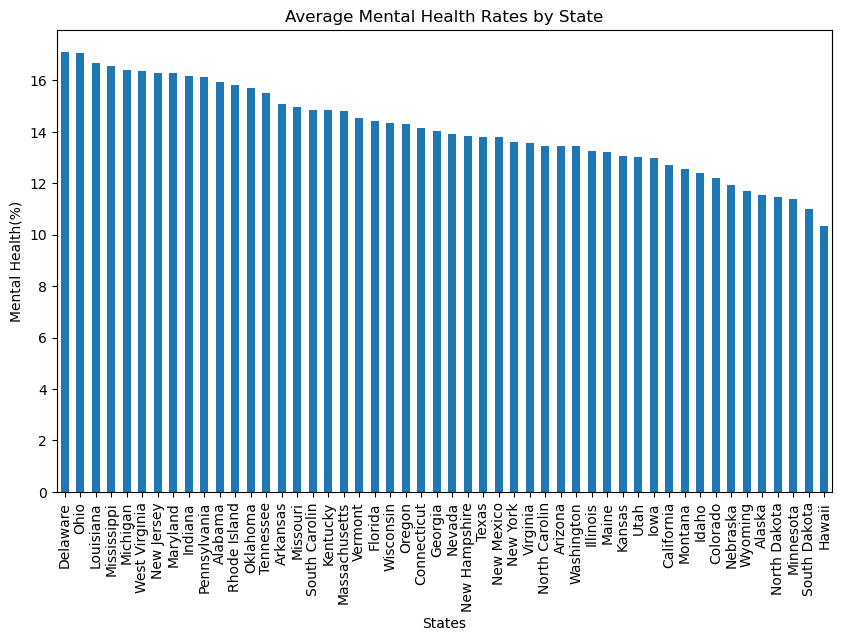

In [89]:
# Group State & Mental Health Data
mentalhealth_bar = mental_healthDf.groupby(['StateDesc'])['Data_Value'].mean()

plt.figure(figsize=(10, 6))
# plot the group in decsending order 
mentalhealth_bar.sort_values(ascending=False).plot.bar()

# Label x,y axis
plt.xlabel('States')
plt.ylabel('Mental Health(%)')
plt.title('Average Mental Health Rates by State')

Text(0.5, 1.0, 'Average Heart Disease Rates by State')

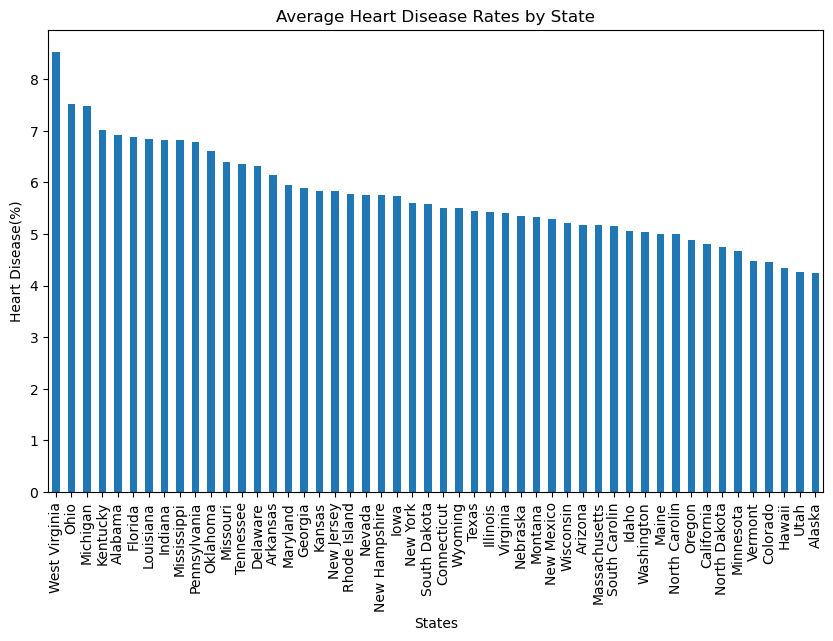

In [90]:
# Group State & Mental Health Data
heartdisease_bar = heart_diseaseDf.groupby(['StateDesc'])['Data_Value'].mean()

plt.figure(figsize=(10, 6))
# plot the group in decsending order 
heartdisease_bar.sort_values(ascending=False).plot.bar()

# Label x,y axis & title
plt.xlabel('States')
plt.ylabel('Heart Disease(%)')
plt.title('Average Heart Disease Rates by State')
